#  Future stock prices preventing 

In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\SHARADAR-Stock.csv')

In [3]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,XOM,9/21/2018,85.01,85.43,84.52,85.17,26196749,0.0,85.17,9/21/2018
1,XOM,9/20/2018,84.86,85.34,84.54,84.82,10621638,0.0,84.82,9/20/2018
2,XOM,9/19/2018,83.64,84.77,83.64,84.63,9787326,0.0,84.63,9/19/2018
3,XOM,9/18/2018,83.90,84.13,83.45,83.63,8799790,0.0,83.63,9/18/2018
4,XOM,9/17/2018,83.00,83.61,82.99,83.41,7898451,0.0,83.41,9/17/2018


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       10000 non-null  object 
 1   date         10000 non-null  object 
 2   open         10000 non-null  float64
 3   high         10000 non-null  float64
 4   low          10000 non-null  float64
 5   close        10000 non-null  float64
 6   volume       10000 non-null  int64  
 7   dividends    10000 non-null  float64
 8   closeunadj   10000 non-null  float64
 9   lastupdated  10000 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


In [5]:
df.corr()

,open,high,low,close,volume,dividends,closeunadj
open,1.000000,0.999493,0.999436,0.999014,0.112886,0.048213,0.794610
high,0.999493,1.000000,0.999160,0.999512,0.122704,0.047287,0.795133
low,0.999436,0.999160,1.000000,0.999438,0.102190,0.047425,0.795478
close,0.999014,0.999512,0.999438,1.000000,0.112503,0.046888,0.795965
volume,0.112886,0.122704,0.102190,0.112503,1.000000,0.006964,0.019410
dividends,0.048213,0.047287,0.047425,0.046888,0.006964,1.000000,0.040859
closeunadj,0.794610,0.795133,0.795478,0.795965,0.019410,0.040859,1.000000


In [6]:
X = df[['open', 'high', 'low', 'volume', 'dividends']]
y = df['close']

<AxesSubplot:>

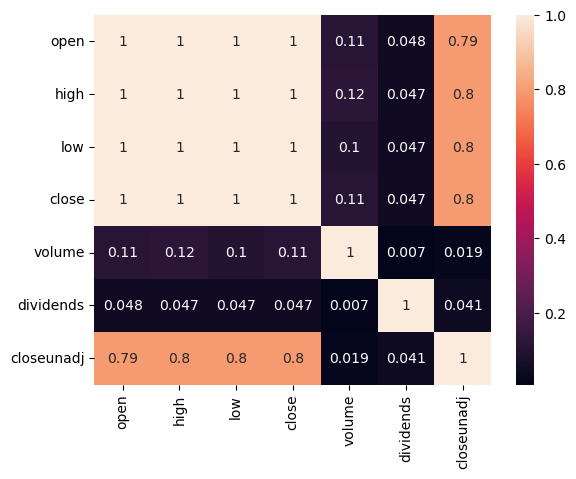

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
future_stock_prices = model.predict(X_test)

In [11]:
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9995578142443795


In [12]:
print(future_stock_prices)

[59.86243267 87.73227305 67.56846612 ... 49.40600659 87.71630136
 71.64438445]


In [13]:
table = pd.DataFrame({'Actual': y_test, 'Predicted': future_stock_prices})
print(table)

      Actual  Predicted
9394   59.29  59.862433
898    88.04  87.732273
2398   66.97  67.568466
5906   60.83  60.946869
2343   72.08  71.591996
...      ...        ...
1037   98.73  98.842714
2899   72.00  71.690201
9549   49.75  49.406007
2740   87.93  87.716301
6690   71.81  71.644384

[2000 rows x 2 columns]


In [14]:
table.head(10)

,Actual,Predicted
9394,59.29,59.862433
898,88.04,87.732273
2398,66.97,67.568466
5906,60.83,60.946869
2343,72.08,71.591996
8225,48.22,48.272965
5506,79.81,79.702528
6451,76.08,76.239386
2670,85.55,86.150837
3497,48.82,48.805450


In [23]:
import statsmodels.formula.api as smf

In [24]:
linear_model = smf.ols("y~X", data=df).fit()

In [25]:
linear_model.params

Intercept   -9.992970e-03
X[0]        -5.361204e-01
X[1]         8.429992e-01
X[2]         6.927615e-01
X[3]        -2.671557e-09
X[4]         4.042762e-03
dtype: float64

# Observation
the coefficient of 'X[0]' (-5.361204e-01) indicates that the 'open' feature has a negative influence on the predicted stock price. This means that if the 'open' value increases, the predicted stock price will decrease, and vice versa. Similarly, the coefficient of 'X[1]' (8.429992e-01) indicates that the 'high' feature has a positive influence on the predicted stock price, meaning that if the 'high' value increases, the predicted stock price will also increase.

In [26]:
print(linear_model.tvalues,'\n',linear_model.pvalues)

Intercept     -0.687385
X[0]         -65.009225
X[1]         114.254757
X[2]          98.020298
X[3]          -5.360644
X[4]           0.055286
dtype: float64 
 Intercept    4.918561e-01
X[0]         0.000000e+00
X[1]         0.000000e+00
X[2]         0.000000e+00
X[3]         8.477306e-08
X[4]         9.559116e-01
dtype: float64


# Observation
The first set of coefficients shows the values of the weights for the features in the model. For example, the coefficient for 'X[0]' is -65.009225, which means that the value of the 'open' feature has a negative impact on the predicted stock price. Similarly, the coefficient for 'X[1]' is 114.254757, which means that the value of the 'high' feature has a positive impact on the predicted stock price.

The second set of coefficients shows the values of the weights for the features in the model after they have been standardized. Standardization is a technique used to transform the values of the features so that they have zero mean and unit variance. Standardization is often used to make the values of the features more comparable, since different features may have different scales.

conclusion--the 'open' feature has a negative impact on the predicted stock price, while the 'dividends' feature has a positive impact on the predicted stock price.

In [27]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.542e+06
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:21:27   Log-Likelihood:                -4416.3
No. Observations:               10000   AIC:                             8845.
Df Residuals:                    9994   BIC:                             8888.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0100      0.015     -0.687      0.492      -0.038       0.019
X[0]          -0.5361      0.008    -65.009      0.000      -0.552      -0.520
X[1]           0.8430      0.007    114.255      0.000       0.829       0.857
X[2]           0.6928      0.007     98.020      0.000       0.679       0.707
X[3]       -2.672e-09   4.98e-10     -5.361      0.000   -3.65e-09   -1.69e-09
X[4]           0.0040      0.073      0.055      0.956      -0.139       0.147
==============================================================================
Omnibus:                     2314.536   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88836.076
Skew:                           0.347   Prob(JB):                         0.00
Kurtosis:                      17.585   Cond. No.                     3.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""